In [2]:
import pandas as pd


df = pd.read_csv('/content/ex2data1.txt', delimiter=',', header=None)
df.columns = ['Exam1', 'Exam2', 'Admitted']  # Renaming columns for clarity
print(df.head())

       Exam1      Exam2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1


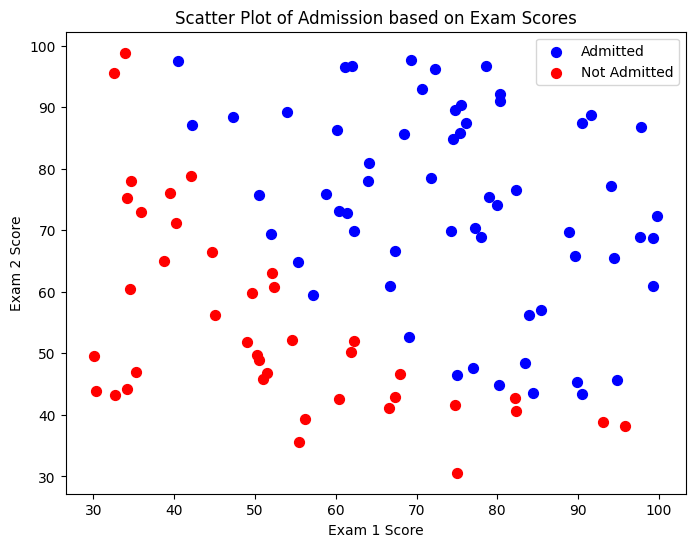

In [3]:
# Create Scatter Plot

import matplotlib.pyplot as plt

# Create two subsets for admitted and not admitted
admitted = df[df['Admitted'] == 1]
not_admitted = df[df['Admitted'] == 0]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(admitted['Exam1'], admitted['Exam2'], color='blue', label='Admitted', s=50)
plt.scatter(not_admitted['Exam1'], not_admitted['Exam2'], color='red', label='Not Admitted', s=50)
plt.title('Scatter Plot of Admission based on Exam Scores')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.legend()
plt.show()

Admitted students tend to have higher exam scores.

In [4]:
#  Logistic Regression using scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define features and target variable
X = df[['Exam1', 'Exam2']]  # Features: Exam1 and Exam2 scores
y = df['Admitted']          # Target: Admitted (0 or 1)

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [5]:
# Making Predictions

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the Logistic Regression model: {accuracy:.4f}')

Accuracy of the Logistic Regression model: 0.8000


In [6]:
from sklearn.metrics import classification_report, confusion_matrix

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, Recall, F1-Score
report = classification_report(y_test, y_pred, target_names=['Not Admitted', 'Admitted'])
print("\nClassification Report (Precision, Recall, F1-Score):")
print(report)

Confusion Matrix:
[[7 1]
 [3 9]]

Classification Report (Precision, Recall, F1-Score):
              precision    recall  f1-score   support

Not Admitted       0.70      0.88      0.78         8
    Admitted       0.90      0.75      0.82        12

    accuracy                           0.80        20
   macro avg       0.80      0.81      0.80        20
weighted avg       0.82      0.80      0.80        20



Logistic Regression Model: Trained on the dataset to find the best fit parameters that can separate admitted students from non-admitted students.

Accuracy: The accuracy score indicates the percentage of correct predictions out of the total predictions. A higher accuracy score means the model is performing well in distinguishing between admitted and non-admitted students.

Interpretation: The logistic regression model's output (accuracy) shows how well it generalizes on unseen data (test set).

The model has performed reasonably well with an overall accuracy of 80%. It shows strong performance in predicting Admitted cases, with high precision (0.90) and a good balance between precision and recall (F1-Score of 0.82).

The performance on Not Admitted cases is slightly weaker, with lower precision (0.70) but higher recall (0.88). This indicates the model is more effective at identifying Not Admitted cases but sometimes incorrectly labels Admitted cases as Not Admitted.

The macro and weighted averages indicate that the model's overall performance is consistent across both classes.